In [333]:
import pandas as pd
import numpy as np
# import metadata as md
from clean_data import refine_data
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import  DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [334]:
raw_df = pd.read_csv("raw_features.csv")
df_ = refine_data(raw_df)

In [335]:
df = df_.drop_duplicates(subset=df_.columns[3:])

In [336]:
cols = ["A1","B1"]
id = "grade"
df1 = df.drop(["id"],axis=1)
df2 = df.drop(["id","grade"],axis=1)
df3 = df.drop(["id","grade","benchmark"],axis=1)

dup1 = df1[df1.duplicated()]
dup2 = df2[df2.duplicated()]
dup3 = df3[df3.duplicated()]


print(dup1.shape,dup2.shape,dup3.shape)

(0, 200) (0, 199) (0, 198)


In [337]:
X = df.drop(["id","grade","benchmark"],axis=1).values
y = df["grade"].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(np.array(Xtrain.tolist()))
X_test = torch.FloatTensor(np.array(Xtest.tolist()))

y_train = torch.LongTensor(np.array(ytrain.tolist()))
y_test = torch.LongTensor(np.array(ytest.tolist()))

### Get input and output trainng and test datasets

In [338]:
X_train = torch.FloatTensor(np.array(X_train.tolist()))
y_train = torch.LongTensor(np.array(y_train.tolist()))

X_test = torch.FloatTensor(np.array(X_test.tolist()))
y_test = torch.LongTensor(np.array(y_test.tolist()))

In [339]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [340]:
class Model(nn.Module):
    def __init__(self, in_features=198, h=[40,40,20,20], out_features=14):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h[0])    # input layer
        self.fc2 = nn.Linear(h[0], h[1])            # hidden layer
        self.fc3 = nn.Linear(h[1], h[2])            # hidden layer
        self.fc4 = nn.Linear(h[2], h[3])            # hidden layer
        # self.fc5 = nn.Linear(h[3], h[4])            # hidden layer
        # self.fc6 = nn.Linear(h[4], h[5])            # hidden layer
        self.out = nn.Linear(h[3], out_features)  # output layer
        
    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = F.tanh(self.fc3(x))
        #x = F.tanh(self.fc4(x))
        #x = F.tanh(self.fc5(x))
        x = F.relu(self.fc4(x))
        x = self.out(x)
        return x
    

In [341]:
# FOR REDO
torch.manual_seed(32)
model = Model()

In [342]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [343]:
epochs = 1000
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    
    
    # a neat trick to save screen space:
    # if i%10 == 1:
    #     print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Text(0.5, 0, 'epoch')

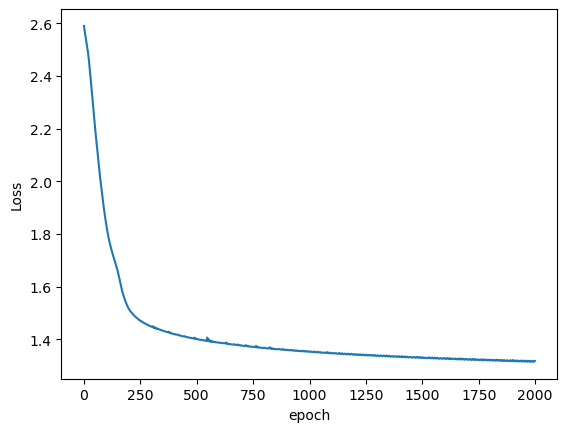

In [344]:

plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [345]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

1.50089288


In [346]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        #print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        print(y_val.argmax().item(), y_test[i],y_val.argmax().item() == y_test[i])
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

1 tensor(1) tensor(True)
3 tensor(1) tensor(False)
8 tensor(7) tensor(False)
1 tensor(1) tensor(True)
5 tensor(6) tensor(False)
3 tensor(5) tensor(False)
8 tensor(10) tensor(False)
5 tensor(6) tensor(False)
4 tensor(3) tensor(False)
5 tensor(7) tensor(False)
5 tensor(7) tensor(False)
1 tensor(3) tensor(False)
1 tensor(1) tensor(True)
3 tensor(1) tensor(False)
4 tensor(5) tensor(False)
1 tensor(1) tensor(True)
3 tensor(4) tensor(False)
1 tensor(3) tensor(False)
1 tensor(1) tensor(True)
1 tensor(1) tensor(True)
7 tensor(9) tensor(False)
1 tensor(2) tensor(False)
7 tensor(9) tensor(False)
1 tensor(1) tensor(True)
4 tensor(2) tensor(False)
1 tensor(2) tensor(False)
3 tensor(3) tensor(True)
3 tensor(5) tensor(False)
3 tensor(3) tensor(True)
5 tensor(5) tensor(True)
3 tensor(3) tensor(True)
4 tensor(3) tensor(False)
3 tensor(3) tensor(True)
1 tensor(1) tensor(True)
4 tensor(4) tensor(True)
3 tensor(2) tensor(False)
1 tensor(1) tensor(True)
1 tensor(1) tensor(True)
5 tensor(6) tensor(False)
1

5 tensor(9) tensor(False)
3 tensor(3) tensor(True)
1 tensor(1) tensor(True)
3 tensor(2) tensor(False)
1 tensor(1) tensor(True)
8 tensor(11) tensor(False)
3 tensor(4) tensor(False)
8 tensor(8) tensor(True)
5 tensor(7) tensor(False)
1 tensor(3) tensor(False)
8 tensor(7) tensor(False)
1 tensor(1) tensor(True)
3 tensor(4) tensor(False)
7 tensor(9) tensor(False)
3 tensor(2) tensor(False)
5 tensor(4) tensor(False)
3 tensor(2) tensor(False)
5 tensor(4) tensor(False)
3 tensor(4) tensor(False)
8 tensor(8) tensor(True)
4 tensor(4) tensor(True)
1 tensor(2) tensor(False)
8 tensor(7) tensor(False)
3 tensor(3) tensor(True)
1 tensor(1) tensor(True)
3 tensor(2) tensor(False)
4 tensor(4) tensor(True)
3 tensor(2) tensor(False)
1 tensor(2) tensor(False)
1 tensor(1) tensor(True)
1 tensor(1) tensor(True)
1 tensor(4) tensor(False)
8 tensor(8) tensor(True)
5 tensor(6) tensor(False)
3 tensor(3) tensor(True)
4 tensor(2) tensor(False)
4 tensor(6) tensor(False)
4 tensor(6) tensor(False)
8 tensor(7) tensor(False)